## Why Jupyter notebooks?

Jupyter notebooks allow for the execution of independent snippets of Python code in "cells". These cells can be executed multiple times and the notebook acts as though each line of Python code has been executed in sequence -- as though sequence of lines executed were in one large Python script.

It also allows for the combination of code cells with markdown text cells (_like this one!_).



In [1]:
x = 1.0
print(x)

1.0


This is the OpenMC $x = a + b$.

In [2]:
arr = [1.0, 2.0]

In [3]:
arr

[1.0, 2.0]

In [4]:
import math

In [6]:
math.cos(math.pi)

-1.0

In [7]:
import openmc

## Defining Materials

In [8]:
steel = openmc.Material(name="steel")

In [9]:
steel.add_nuclide("Fe56", 1.0)
steel.add_nuclide("Fe57", 0.5)
steel.set_density('g/cc', 5.0)

In [10]:
print(steel)

Material
	ID             =	1
	Name           =	steel
	Temperature    =	None
	Density        =	5.0 [g/cc]
	S(a,b) Tables  
	Nuclides       
	Fe56           =	1.0          [ao]
	Fe57           =	0.5          [ao]



In [11]:
steel.get_nuclide_atom_densities()

OrderedDict([('Fe56', ('Fe56', 0.0356750769487061)),
             ('Fe57', ('Fe57', 0.01783753847435305))])

In [12]:
air = openmc.Material()
air.add_nuclide('N14', 1.0)
air.set_density('g/cc', 0.001)

In [13]:
air

Material
	ID             =	2
	Name           =	
	Temperature    =	None
	Density        =	0.001 [g/cc]
	S(a,b) Tables  
	Nuclides       
	N14            =	1.0          [ao]

In [14]:
materials = openmc.Materials([steel, air])

In [15]:
materials.export_to_xml()

In [16]:
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material id="1" name="steel">
    <density units="g/cc" value="5.0" />
    <nuclide ao="1.0" name="Fe56" />
    <nuclide ao="0.5" name="Fe57" />
  </material>
  <material id="2">
    <density units="g/cc" value="0.001" />
    <nuclide ao="1.0" name="N14" />
  </material>
</materials>


In [17]:
zr = openmc.Material()
zr.add_element('Zr', 1.0)
zr.set_density('g/cc', 6.0)

In [18]:
zr

Material
	ID             =	3
	Name           =	
	Temperature    =	None
	Density        =	6.0 [g/cc]
	S(a,b) Tables  
	Nuclides       
	Zr90           =	0.5145       [ao]
	Zr91           =	0.1122       [ao]
	Zr92           =	0.1715       [ao]
	Zr94           =	0.1738       [ao]
	Zr96           =	0.028        [ao]

In [19]:
!echo $OPENMC_CROSS_SECTIONS

/home/ubuntu/data/endfb71_hdf5/cross_sections.xml


In [20]:
!head -n 50 $OPENMC_CROSS_SECTIONS

<?xml version='1.0' encoding='utf-8'?>
<cross_sections>
  <library materials="H1" path="H1.h5" type="neutron" />
  <library materials="H2" path="H2.h5" type="neutron" />
  <library materials="H3" path="H3.h5" type="neutron" />
  <library materials="He3" path="He3.h5" type="neutron" />
  <library materials="He4" path="He4.h5" type="neutron" />
  <library materials="Li6" path="Li6.h5" type="neutron" />
  <library materials="Li7" path="Li7.h5" type="neutron" />
  <library materials="Be7" path="Be7.h5" type="neutron" />
  <library materials="Be9" path="Be9.h5" type="neutron" />
  <library materials="B10" path="B10.h5" type="neutron" />
  <library materials="B11" path="B11.h5" type="neutron" />
  <library materials="C0" path="C0.h5" type="neutron" />
  <library materials="N14" path="N14.h5" type="neutron" />
  <library materials="N15" path="N15.h5" type="neutron" />
  <library materials="O16" path="O16.h5" type="neutron" />
  <library materials="O17" path="O17.h5" type="neutron" />
  <libra

In [21]:
oxy = openmc.Material()
oxy.add_element('O', 1.0)
oxy

Material
	ID             =	4
	Name           =	
	Temperature    =	None
	Density        =	None [sum]
	S(a,b) Tables  
	Nuclides       
	O16            =	0.999621     [ao]
	O17            =	0.000379     [ao]

In [22]:
oxy.add_nuclide('Am242_m1', 0.34)

In [ ]:
openmc.data.water_density

## Defining Geometry
  1. Surfaces -- definition of some surface equation
    $f(x,y,z) = x^2 + y^2 + z^2 - R^2 = 0$
  2. Regions -- well-defined volume composed of the intersection (&) and union (|) of surface half-spaces
  3. Cells -- assignment of material, temperature, etc. to a region

In [23]:
sph = openmc.Sphere(r=10.0, boundary_type='vacuum')

In [25]:
sph.boundary_type = 'abc'

ValueError: Unable to set "boundary type" to "abc" since it is not in "['transmission', 'vacuum', 'reflective', 'periodic', 'white']"

**Surface operations**: +, -

In [26]:
inside_sphere = -sph

In [27]:
inside_sphere

In [28]:
(0, 0, 0) in inside_sphere

True

In [29]:
(1, 0, 0) in inside_sphere

True

In [35]:
(10, 0, 0) in inside_sphere

False

In [ ]:
openmc.Sphere

In [36]:
plane = openmc.XPlane()

In [37]:
+plane # above plane
-plane # below plane

**Region operators**:

  - & (intersection)
  - | (union)
  - ~ (complement)

In [38]:
# intersection operation
top_half_of_sphere = -sph & +plane

In [39]:
(-1, 0, 0) in top_half_of_sphere

False

In [40]:
(1, 0, 0) in top_half_of_sphere

True

In [41]:
# union operation
some_region = -sph | -plane

In [43]:
(10.1, 0, 0) in some_region

False

In [44]:
# complement operator
opposite_some_region = ~some_region

In [45]:
(-1, 0, 0) in some_region

True

In [46]:
(-1, 0, 0) in opposite_some_region

False

In [47]:
steel_cell = openmc.Cell(fill=steel, region=-sph)
air_cell = openmc.Cell(fill=air, region=+sph)

In [48]:
air_cell

Cell
	ID             =	2
	Name           =	
	Fill           =	Material 2
	Region         =	1
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None

In [49]:
steel_cell

Cell
	ID             =	1
	Name           =	
	Fill           =	Material 1
	Region         =	-1
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None

In [50]:
universe = openmc.Universe(name='my_universe', cells=[steel_cell, air_cell])

In [51]:
universe

Universe
	ID             =	1
	Name           =	my_universe
	Geom           =	CSG
	Cells          =	[1, 2]

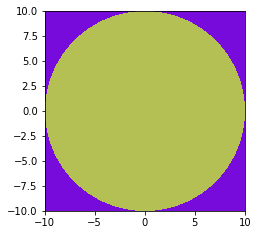

In [52]:
universe.plot(width=(20.0, 20.0))

In [54]:
inside_sphere.bounding_box

(array([-10., -10., -10.]), array([10., 10., 10.]))

In [55]:
outside_sphere = +sph

In [56]:
outside_sphere.bounding_box

(array([-inf, -inf, -inf]), array([inf, inf, inf]))

In [57]:
top_half_of_sphere

(array([  0., -10., -10.]), array([10., 10., 10.]))

## Running a Pincell Problem

In [58]:
uo2 = openmc.Material()
uo2.add_nuclide('U235', 0.02)
uo2.add_nuclide('U238', 0.86)
uo2.add_element('O', 0.12)
uo2.set_density('g/cc', 10.0)

In [60]:
uo2.volume = 10.0

In [61]:
uo2.fissionable_mass

99.09179559881375

In [63]:
zr = openmc.Material()
zr.add_element('Zr', 1.0)
zr.set_density('g/cc', 6.0)

In [71]:
water = openmc.Material()
water.add_element('H', 2.0)
water.add_element('O', 1.0)
water.set_density('g/cc', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')

In [72]:
materials = openmc.Materials([uo2, zr, water])
materials.export_to_xml()


In [73]:
fuel_outer_radius = openmc.ZCylinder(r=0.39)
clad_outer_radius = openmc.ZCylinder(r=0.46)

pitch = 1.26 # cm

left = openmc.XPlane(-pitch/2)
right = openmc.XPlane(pitch/2)
bottom = openmc.YPlane(-pitch/2)
top = openmc.YPlane(pitch/2)

inside_box = +left & -right & +bottom & -top

In [74]:
openmc.rectangular_prism

<function openmc.model.funcs.rectangular_prism(width, height, axis='z', origin=(0.0, 0.0), boundary_type='transmission', corner_radius=0.0)>

In [75]:
for surface in [left, right, bottom, top]:
    surface.boundary_type = 'reflective'

In [76]:
fuel_cell = openmc.Cell(fill=uo2, region=-fuel_outer_radius)
clad_cell = openmc.Cell(fill=zr, region=+fuel_outer_radius & -clad_outer_radius)
water_cell = openmc.Cell(fill=water, region=+clad_outer_radius & inside_box)

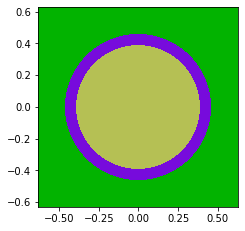

In [77]:
universe = openmc.Universe(cells=[fuel_cell, clad_cell, water_cell])
universe.plot(width=(pitch, pitch))

In [78]:
geom = openmc.Geometry(root=universe)
geom.export_to_xml()

In [79]:
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="6" material="5" region="-9" universe="3" />
  <cell id="7" material="6" region="9 -10" universe="3" />
  <cell id="8" material="8" region="10 11 -12 13 -14" universe="3" />
  <surface coeffs="0.0 0.0 0.39" id="9" type="z-cylinder" />
  <surface coeffs="0.0 0.0 0.46" id="10" type="z-cylinder" />
  <surface boundary="reflective" coeffs="-0.63" id="11" type="x-plane" />
  <surface boundary="reflective" coeffs="0.63" id="12" type="x-plane" />
  <surface boundary="reflective" coeffs="-0.63" id="13" type="y-plane" />
  <surface boundary="reflective" coeffs="0.63" id="14" type="y-plane" />
</geometry>


In [80]:
settings = openmc.Settings()
settings.batches = 20
settings.inactive = 10
settings.particles = 1000

In [81]:
settings.export_to_xml()

In [82]:
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>20</batches>
  <inactive>10</inactive>
</settings>


In [83]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

## The Model Class

In [84]:
model = openmc.Model(geometry=geom, materials=materials, settings=settings)

In [85]:
sp_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [86]:
sp_filename

PosixPath('/home/ubuntu/notebooks/notebooks/statepoint.20.h5')